# Klassifikation mit logistischer Regression

**Ziel**: Wir implementieren einen einfachen Klassifizierer basierend auf logistischer Regression. Das System erhält Bilder als Input und soll klassifizieren, ob darauf eine Katze zu sehen ist oder nicht.**

**Anweisungen:**
- Verwenden Sie keine Schleifen (for/while) in Ihrem Code, es sei denn, die Anweisungen fordern Sie ausdrücklich dazu auf.
- Verwenden Sie `np.dot(X,Y)`, um das Skalarprodukt zweier Vektoren zu berechnen.

**Quelle:** DeepLearning.AI

## Schritte
- [1 - Bibliotheken](#1)
- [2 - Problemstellung](#2)
    - [Aufgabe 1 1](#ex-1)
    - [Aufgabe 2 2](#ex-2)
- [3 - Allgemeine Architektur eines Lernalgorithmus](#3)
- [4 - Aufbau der Teile unseres Algorithmus](#4)
    - [4.1 - Hilfsfunktionen](#4-1)
        - [Aufgabe 3 - sigmoid](#ex-3)
    - [4.2 - Initialisierung der Parameter](#4-2)
        - [Aufgabe 4 - Initialisierung mit Nullen](#ex-4)
    - [4.3 - Forward and Backward Propagation](#4-3)
        - [Aufgabe 5 - propagate](#ex-5)
    - [4.4 - Optimierung](#4-4)
        - [Aufgabe 6 - Optimieren](#ex-6)
        - [Aufgabe 7 - Vorhersage / Prediction](#ex-7)
- [5 - Alle Funktionen zu einem Modell zusammenfügen](#5)
    - [Aufgabe 8 - Modell](#ex-8)
- [6 - Weitere Analyse](#6)
- [7 - Testen Sie mit Ihrem eigenen Bild](#7)

<a name='1'></a>
## 1 - Bibliotheken ##

Führen Sie zunächst die unten stehende Zelle aus, um alle Pakete zu importieren, die Sie für diese Aufgabe benötigen. 
- [numpy](https://numpy.org/doc/1.20/) ist das grundlegende Paket für mehrdimensionale Datenstrukturen und wissenschaftliche Berechnungen mit Python.
- [h5py](http://www.h5py.org) ist ein allgemeines Paket zur Interaktion mit einem Datensatz, der in einer [H5-Datei](https://de.wikipedia.org/wiki/Hierarchical_Data_Format) gespeichert ist.
- [matplotlib](http://matplotlib.org) ist eine Bibliothek zum Zeichnen von Diagrammen in Python.
- [PIL](https://pillow.readthedocs.io/en/stable/) und [scipy](https://www.scipy.org/) werden  verwendet, um Ihr Modell mit einem eigenen Bild am Ende zu testen.

In [2]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset
from public_tests import *

<a name='2'></a>
## 2 - Problemstellung ##

Sie erhalten einen Datensatz ("data.h5"), der enthält:
    - eine Trainingsmenge von m_train Bildern, die als Katze (y=1) oder Nicht-Katze (y=0) gelabelt sind
    - einen Testsatz von m_test Bildern, die als Katze oder Nicht-Katze gekennzeichnet sind
    - jedes Bild hat die Form (num_px, num_px, 3), wobei 3 für die 3 Kanäle (RGB) steht. Jedes Bild ist also quadratisch (Höhe = num_px) und (Breite = num_px).

Sie werden einen einfachen Algorithmus erstellen, der Bilder als Katze oder Nicht-Katze klassifiziert.

Machen wir uns zunächst mit dem Datensatz vertraut. Laden Sie die Daten, indem Sie den folgenden Code ausführen.

In [3]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

Wir haben "_orig" am Ende der Bilddatensätze (train und test) hinzugefügt, weil wir sie vorverarbeiten werden. Nach der Vorverarbeitung erhalten wir train_set_x und test_set_x (die Labels train_set_y und test_set_y müssen nicht vorverarbeitet werden).

Jede Zeile von train_set_x_orig und test_set_x_orig ist ein Array, das ein Bild darstellt. Sie können sich ein Beispiel ansehen, indem Sie den folgenden Code ausführen. Sie können auch den `index- Wert ändern und erneut ausführen, um andere Bilder zu sehen. 

y = [1], it's a 'cat' picture.


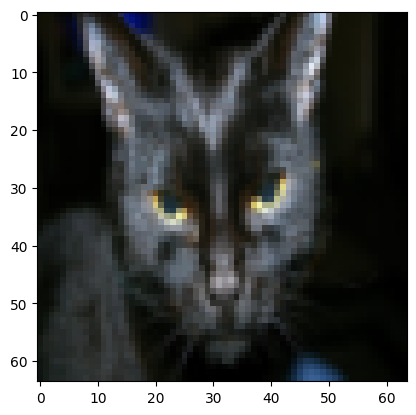

In [5]:
# Example of a picture
index = 25
plt.imshow(train_set_x_orig[index])
print(
    f"y = {str(train_set_y[:, index])}, it's a '"
    + classes[np.squeeze(train_set_y[:, index])].decode("utf-8")
    + "' picture."
)

Viele Softwarefehler beim Deep Learning entstehen durch nicht passende Matrix-/Vektordimensionen. Wenn Sie Ihre Matrix-/Vektor-Dimensionen im Griff halten, werden Sie viele Fehler vermeiden. 

<a name='ex-1'></a>
### Aufgabe 1
Finden Sie die Werte für:
    - m_train (Anzahl der Trainingsbeispiele)
    - m_test (Anzahl der Testbeispiele)
    - num_px (= Höhe = Breite eines Trainingsbildes)
Denken Sie daran, dass `train_set_x_orig` ein numpy-Array der Form (m_train, num_px, num_px, 3) ist. Sie können zum Beispiel auf `m_train` zugreifen, indem Sie `train_set_x_orig.shape[0]` schreiben.

In [ ]:
#(≈ 3 lines of code)
# m_train = 
# m_test = 
# num_px = 
# YOUR CODE STARTS HERE


# YOUR CODE ENDS HERE

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

**Erwartete Ausgabe für m_train, m_test and num_px**: 
<table style="width:15%">
  <tr>
    <td> m_train </td>
    <td> 209 </td> 
  </tr>
  
  <tr>
    <td>m_test</td>
    <td> 50 </td> 
  </tr>
  
  <tr>
    <td>num_px</td>
    <td> 64 </td> 
  </tr>
  
</table>


Der Einfachheit halber sollten Sie nun Bilder der Form (num_px, num_px, 3) in ein numpy-Array der Form (num_px $*$ num_px $*$ 3, 1) umformen. Danach ist unser Trainings- (und Test-) Datensatz ein numpy-array, in dem jede Spalte ein reduziertes Bild darstellt. Es sollten m_train (bzw. m_test) Spalten sein.

<a name='ex-2'></a>
### Aufgabe 2
Formen Sie die Trainings- und Testdatensätze so um, dass Bilder der Größe (num_px, num_px, 3) in einzelne Vektoren der Form (num\_px $*$ num\_px $*$ 3, 1) "flachgeklopft"" werden.

Ein Trick, wenn man eine Matrix X der Form (a,b,c,d) in eine Matrix X_flatten der Form (b$*$c$*$d, a) umwandeln will, ist die Verwendung von: 
```python
X_flatten = X.reshape(X.shape[0], -1).T # X.T ist die Transponierte von X

In [ ]:
# Reshape the training and test examples
#(≈ 2 lines of code)
# train_set_x_flatten = ...
# test_set_x_flatten = ...
# YOUR CODE STARTS HERE


# YOUR CODE ENDS HERE

# Check that the first 10 pixels of the second image are in the correct place
assert np.alltrue(train_set_x_flatten[0:10, 1] == [196, 192, 190, 193, 186, 182, 188, 179, 174, 213]), "Wrong solution. Use (X.shape[0], -1).T."
assert np.alltrue(test_set_x_flatten[0:10, 1] == [115, 110, 111, 137, 129, 129, 155, 146, 145, 159]), "Wrong solution. Use (X.shape[0], -1).T."

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

**Erwartete Ausgabe:**: 

<table style="width:35%">
  <tr>
    <td>train_set_x_flatten shape</td>
    <td> (12288, 209)</td> 
  </tr>
  <tr>
    <td>train_set_y shape</td>
    <td>(1, 209)</td> 
  </tr>
  <tr>
    <td>test_set_x_flatten shape</td>
    <td>(12288, 50)</td> 
  </tr>
  <tr>
    <td>test_set_y shape</td>
    <td>(1, 50)</td> 
  </tr>
</table>

Zur Darstellung von Farbbildern müssen die Rot-, Grün- und Blaukanäle (RGB) für jedes Pixel angegeben werden, so dass der Pixelwert eigentlich ein Vektor aus drei Zahlen zwischen 0 und 255 ist.

Ein üblicher Vorverarbeitungsschritt beim maschinellen Lernen besteht darin, den Datensatz zu zentrieren und zu standardisieren. Das bedeutet, dass Sie den Mittelwert des gesamten Numpy-Arrays von jedem Beispiel abziehen und dann jedes Beispiel durch die Standardabweichung des gesamten Numpy-Arrays dividieren. Bei Bilddatensätzen ist es jedoch einfacher und bequemer und funktioniert fast genauso gut, wenn Sie einfach jede Zeile des Datensatzes durch 255 (den Höchstwert eines Pixelkanals) teilen.

<!-- Während des Trainings Ihres Modells werden Sie Parameter mit initialen Eingabewerten multiplizieren Dann trainieren Sie das Modell durch Backpropagation mit den Gradienten. Es ist jedoch äußerst wichtig, dass jedes Feature einen ähnlichen Wertebereich hat, damit unsere Gradienten nicht explodieren.!--> 

Lassen Sie nun unseren Datensatz standardisieren.

In [ ]:
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

**Was Sie sich merken müssen:**

Die üblichen Schritte zur Vorverarbeitung eines neuen Datensatzes sind:
- Bestimmen Sie die Anzahl der Dimensionen und die Shapes des Problems (m_train, m_test, num_px, ...).
- Standardisieren Sie die Daten.

<a name='3'></a>
## 3 - Allgemeine Architektur eines Lernalgorithmus ##

Wir werden jetzt einen einfachen Algorithmus entwickeln, um Katzenbilder von Nicht-Katzenbildern zu unterscheiden.

Sie werden eine logistische Regression entwickeln. Die folgende Abbildung erklärt, dass die logistische Regression eigentlich ein sehr einfaches Neuronales Netz ist!

<img src="images/LogReg_kiank.png" style="width:650px;height:400px;">

**Mathematische Darstellung des Algorithmus**:

Für ein Trainingsbeispiel: $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = \sigma(z^{(i)})\tag{2}$$ 
$$ \mathscr{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

Die Kosten werden dann als Summe über alle Trainingsdaten berechnet::
$$ \mathscr{J} = \frac{1}{m} \sum_{i=1}^m \mathscr{L}(a^{(i)}, y^{(i)})\tag{6}$$

**Schritte**:
In dieser Übung führen Sie die folgenden Schritte durch: 
- Initialisieren Sie die Parameter des Modells
- Lernen Sie die Parameter des Modells durch Minimierung der Kostenfunktion  
- Verwenden Sie die erlernten Parameter, um Predictions zu berechnen (auf dem Testdatensatz)
- Analysieren Sie die Ergebnisse und ziehen Sie Schlussfolgerungen

<a name='4'></a>
## 4 - Aufbau der Teile unseres Algorithmus ## 

Die wichtigsten Schritte zum Aufbau eines neuronalen Netzes sind:
1. Definieren der Modellstruktur (z.B. Anzahl der Eingangsmerkmale / Features) 
2. Initialisierung der Parameter des Modells
3. Schleife:
    - Berechnung des aktuellen Verlustwerts, d.h. der Abweichung zwischen vorhergesagten und tatsächlichen Werten (Vorwärtspropagation)
    - Berechnen des aktuellen Gradienten (Rückwärtspropagation)
    - Aktualisierung der Parameter (Gradientenabstieg / Gradient Descent)

Oft baut man die SChritte 1-3 separat auf und integriert sie in eine Funktion, die wir `Modell()` nennen.

<a name='4-1'></a>
### 4.1 - Hilfsfunktionen

<a name='ex-3'></a>
### Aufgabe 3 - sigmoid
Implementieren Sie `sigmoid()`. Wie Sie in der Abbildung oben gesehen haben, müssen Sie $sigmoid(z) = \sigma(z) = \frac{1}{1 + e^{-z}}$ für $z = w^T x + b$ berechnen, um Vorhersagen zu machen. Verwenden Sie np.exp().

In [ ]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    #(≈ 1 line of code)
    # s = ...
    # YOUR CODE STARTS HERE
    
    
    # YOUR CODE ENDS HERE
    
    return s

In [ ]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid_test(sigmoid)

In [ ]:
x = np.array([0.5, 0, 2.0])
output = sigmoid(x)
print(output)

<a name='4-2'></a>
### 4.2 - Initialisierung der Parameter

<a name='ex-4'></a>
### Aufgabe 4 - Initialisierung mit Nullen
Implementieren Sie die Initialisierung der Parameter in der folgenden Zelle. Sie müssen w als einen Vektor von Nullen initialisieren. Wenn Sie nicht wissen, welche Numpy-Funktion Sie verwenden sollen, schlagen Sie in der Dokumentation der Numpy-Bibliothek unter np.zeros() nach.

In [ ]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias) of type float
    """
    
    # (≈ 2 lines of code)
    # w = ...
    # b = ...
    # YOUR CODE STARTS HERE
    
    
    # YOUR CODE ENDS HERE

    return w, b

In [ ]:
dim = 2
w, b = initialize_with_zeros(dim)

assert type(b) == float
print ("w = " + str(w))
print ("b = " + str(b))

initialize_with_zeros_test_1(initialize_with_zeros)
initialize_with_zeros_test_2(initialize_with_zeros)

<a name='4-3'></a>
### 4.3 - Forward and Backward Propagation

Nun, da die Parameter initialisiert sind, können Sie die Schritte "Forward and Backward Propagation" zum Lernen der Parameter durchführen.

<a name='ex-5'></a>
### Aufgabe 5 - propagate
Implementieren Sie eine Funktion `propagate()`, die die Kostenfunktion und ihren Gradienten berechnet.

**Hinweise**:

Forward Propagation:
- Eingabe: X
- Sie berechnen: $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- Sie berechnen die Kostenfunktion: $\mathscr{J} = -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)}))$

Zwei Formeln, die Sie verwenden werden: 

$$ \frac{\partial \mathscr{J}}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial \mathscr{J}}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [ ]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    grads -- dictionary containing the gradients of the weights and bias
            (dw -- gradient of the loss with respect to w, thus same shape as w)
            (db -- gradient of the loss with respect to b, thus same shape as b)
    cost -- negative log-likelihood cost for logistic regression
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    #(≈ 2 lines of code)
    # compute activation
    # A = ...
    # compute cost by using np.dot to perform multiplication. 
    # And don't use loops for the sum.
    # cost = ...                                
    # YOUR CODE STARTS HERE
    
    
    # YOUR CODE ENDS HERE

    # BACKWARD PROPAGATION (TO FIND GRAD)
    #(≈ 2 lines of code)
    # dw = ...
    # db = ...
    # YOUR CODE STARTS HERE
    
    
    # YOUR CODE ENDS HERE
    cost = np.squeeze(np.array(cost))

    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [ ]:
w =  np.array([[1.], [2]])
b = 1.5

# X is using 3 examples, with 2 features each
# Each example is stacked column-wise
X = np.array([[1., -2., -1.], [3., 0.5, -3.2]])
Y = np.array([[1, 1, 0]])
grads, cost = propagate(w, b, X, Y)

assert type(grads["dw"]) == np.ndarray
assert grads["dw"].shape == (2, 1)
assert type(grads["db"]) == np.float64


print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

propagate_test(propagate)

**Erwartete Ausgabe:**

```
dw = [[ 0.25071532]
 [-0.06604096]]
db = -0.1250040450043965
cost = 0.15900537707692405

<a name='4-4'></a>
### 4.4 - Optimierung
- Sie haben Ihre Parameter initialisiert.
- Sie sind auch in der Lage, eine Kostenfunktion und ihren Gradienten zu berechnen.
- Nun wollen Sie die Parameter mit Hilfe des Gradientenabstiegs / Gradient Descent aktualisieren.

<a name='ex-6'></a>
### Aufgabe 6 - Optimieren
Schreiben Sie die Optimierungsfunktion. Ziel ist es, $w$ und $b$ durch Minimierung der Kostenfunktion $\mathscr{J}$ zu lernen. Für einen Parameter $\theta$ lautet die Aktualisierungsregel $ \theta = \theta - \alpha \text{ } d\theta$, wobei $\alpha$ die Lernrate ist.

In [ ]:
def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    
    for i in range(num_iterations):
        # (≈ 1 lines of code)
        # Cost and gradient calculation 
        # grads, cost = ...
        # YOUR CODE STARTS HERE
        
        
        # YOUR CODE ENDS HERE
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        # w = ...
        # b = ...
        # YOUR CODE STARTS HERE
        
        
        # YOUR CODE ENDS HERE
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
            # Print the cost every 100 training iterations
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [ ]:
params, grads, costs = optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print("Costs = " + str(costs))

optimize_test(optimize)

<a name='ex-7'></a>
### Aufgabe 7 - Vorhersage / Prediction
Die vorherige Funktion gibt die gelernten w und b aus. Wir können w und b verwenden, um die Labels für einen Datensatz X vorherzusagen. Implementieren Sie die Funktion `predict()`. Es gibt zwei Schritte zur Berechnung von Vorhersagen:

1. Berechnen Sie $\hat{Y} = A = \sigma(w^T X + b)$

2. Konvertiere die Einträge von a in 0 (wenn Aktivierung <= 0,5) oder 1 (wenn Aktivierung > 0,5) und speichere die Vorhersagen in einem Vektor `Y_prediction`. Wenn Sie möchten, können Sie eine `if`/`else`-Anweisung in einer `for`-Schleife verwenden (es gibt jedoch auch eine Möglichkeit, dies zu vektorisieren). 

In [ ]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    #(≈ 1 line of code)
    # A = ...
    # YOUR CODE STARTS HERE
    
    
    # YOUR CODE ENDS HERE
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        #(≈ 4 lines of code)
        # if A[0, i] > ____ :
        #     Y_prediction[0,i] = 
        # else:
        #     Y_prediction[0,i] = 
        # YOUR CODE STARTS HERE
        
        
        # YOUR CODE ENDS HERE
    
    return Y_prediction

In [ ]:
w = np.array([[0.1124579], [0.23106775]])
b = -0.3
X = np.array([[1., -1.1, -3.2],[1.2, 2., 0.1]])
print ("predictions = " + str(predict(w, b, X)))

predict_test(predict)

**Was Sie sich merken sollten:**
    
Sie haben mehrere Funktionen implementiert, die folgendes bewirken:
- Initialisierung (w,b)
- Iterative Optimierung des Verlusts, um die Parameter (w,b) zu lernen:
  - Berechnen der Kosten und ihres Gradienten 
  - Aktualisierung der Parameter durch Gradientenabstieg / Gradient Descent
- Verwendung der erlernten (w,b) zur Vorhersage der Bezeichnungen für eine gegebene Menge von Beispielen

<a name='5'></a>
## 5 - Alle Funktionen zu einem Modell zusammenfügen ##

Sie werden nun sehen, wie das Gesamtmodell aufgebaut ist, indem Sie alle Bausteine (Funktionen, die in den vorherigen Teilen implementiert wurden) in der richtigen Reihenfolge zusammenfügen.

<a name='ex-8'></a>
### Aufgabe 8 - Modell
Implementieren Sie die Modellfunktion. Verwenden Sie die folgende Notation:
- Y_prediction_test für Ihre Vorhersagen auf der Testmenge
- Y_prediction_train für Ihre Vorhersagen für die Trainingsmenge
- parameters, grads, costs für die Ausgaben von optimize()

In [ ]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to True to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    # (≈ 1 line of code)   
    # initialize parameters with zeros
    # and use the "shape" function to get the first dimension of X_train
    # w, b = ...
    
    #(≈ 1 line of code)
    # Gradient descent 
    # params, grads, costs = ...
    
    # Retrieve parameters w and b from dictionary "params"
    # w = ...
    # b = ...
    
    # Predict test/train set examples (≈ 2 lines of code)
    # Y_prediction_test = ...
    # Y_prediction_train = ...
    
    # YOUR CODE STARTS HERE
    
    
    # YOUR CODE ENDS HERE

    # Print train/test Errors
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [ ]:
from public_tests import *

model_test(model)

Wenn alle Tests durchlaufen, führen Sie die folgende Zelle aus, um Ihr Modell zu trainieren.

In [ ]:
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=2000, learning_rate=0.005, print_cost=True)

**Bemerkung**: Die Trainingsgenauigkeit liegt nahe bei 100%. Dies ist eine guter Check: Ihr Modell funktioniert und hat eine ausreichende Kapazität, um die Trainingsdaten zu erfassen. Die Testgenauigkeit beträgt 70%. Das ist eigentlich nicht schlecht für dieses einfache Modell, wenn man bedenkt, dass wir einen kleinen Datensatz verwendet haben und dass die logistische Regression ein einfacher, linearer Klassifikator ist. (Wir werden dies noch verbessern.)

Sie sehen auch, dass das Modell die Trainingsdaten eindeutig "overfittet". Overfitting ist ein Problem beim Trainieren von Machine-Learning-Modellen, das auftritt, wenn ein Modell zu komplex ist und zu viele Datenmerkmale (Features) im Trainingsdatensatz lernt, einschließlich des Rauschens und der Ausreißer. Das Modell wird so spezifisch für den Trainingsdatensatz, dass seine Leistung auf neuen, unbekannten Daten deutlich schlechter ist. Es hat im Wesentlichen die zufälligen Fluktuationen in den Trainingsdaten „auswendig gelernt“, statt die zugrundeliegenden Muster zu erfassen, die auf neue Daten generalisiert werden können. Später werden Sie lernen, wie Sie das Overfitting reduzieren können, z. B. durch den Einsatz von Regularisierung. Mit dem folgenden Code (und der Änderung der Variable `index`) können Sie sich die Vorhersagen für die Bilder der Testmenge ansehen.

In [ ]:
# Example of a picture that was wrongly classified.
index = 1
plt.imshow(test_set_x[:, index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[int(logistic_regression_model['Y_prediction_test'][0,index])].decode("utf-8") +  "\" picture.")

Wir zeichnen die Kostenfunktion und die Gradienten.

In [ ]:
# Plot learning curve (with costs)
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()

**Interpretation**:
Sie können sehen, dass die Kosten sinken. Das zeigt, dass die Parameter gelernt werden. Sie sehen jedoch, dass Sie das Modell noch weiter auf dem Trainingssatz trainieren könnten. Versuchen Sie, die Anzahl der Iterationen in der Zelle oben zu erhöhen und führen Sie die Zellen erneut aus. Sie werden feststellen, dass die Genauigkeit der Trainingsmenge steigt, die Genauigkeit der Testmenge jedoch sinkt. Dies zeigt das Overfitting. 

<a name='6'></a>
## 6 - Weitere Analyse ##

Herzlichen Glückwunsch zur Erstellung Ihres ersten Bildklassifikationsmodells. Analysieren wir es weiter und untersuchen mögliche Wahloptionen für die Lernrate $\alpha$. 

#### Wahl der Lernrate ####

**Erinnerung**:
Damit der Gradientenabstieg funktioniert, müssen Sie die Lernrate sinnvoll wählen. Die Lernrate $\alpha$ bestimmt, wie schnell wir die Parameter aktualisieren. Wenn die Lernrate zu groß ist, kann es passieren, dass wir über den optimalen Wert hinausschießen. Wenn sie zu klein ist, brauchen wir zu viele Iterationen, um zu den besten Werten zu konvergieren. Deshalb ist es so wichtig, eine gut abgestimmte Lernrate zu verwenden.

Lassen Sie uns die Lernkurve unseres Modells bei verschiedenen Lernraten vergleichen. Führen Sie die unten stehende Zelle aus. Dies sollte etwa 1 Minute dauern. Probieren Sie ruhig auch andere Werte aus als die drei, die wir in die Variable `learning_rates` eingestellt haben, und sehen Sie, was passiert. 

In [ ]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}

for lr in learning_rates:
    print ("Training a model with learning rate: " + str(lr))
    models[str(lr)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=1500, learning_rate=lr, print_cost=False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for lr in learning_rates:
    plt.plot(np.squeeze(models[str(lr)]["costs"]), label=str(models[str(lr)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

**Interpretation**: 
- Unterschiedliche Lernraten führen zu unterschiedlichen Kosten und damit zu unterschiedlichen Vorhersageergebnissen.
- Wenn die Lernrate zu groß ist (0,01), können die Kosten nach oben und unten schwanken. Sie können sogar divergieren (obwohl in diesem Beispiel die Verwendung von 0,01 immer noch zu einem guten Wert für die Kosten führt). 
- Niedrigere Kosten bedeuten nicht gleich ein besseres Modell. Sie müssen prüfen, ob möglicherweise eine Überanpassung / ein Overfitting vorliegt. Dies ist der Fall, wenn die Trainingsgenauigkeit viel höher ist als die Testgenauigkeit.
- Beim Deep Learning sollten Sie wie folgt vorgehen: 
    - Wählen Sie eine Lernrate, welche die Kostenfunktion am besten minimiert.
    - Wenn Ihr Modell overfittet, verwenden Sie weitere Techniken, um das Overfitting zu verringern. (Wir werden diese später behandeln.) 

<a name='7'></a>
## 7 - Testen Sie mit Ihrem eigenen Bild ##

Herzlichen Glückwunsch zum Abschluss dieser Übung. Sie können nun ein eigenes Bild verwenden und die Ergebnisse Ihres Modells betrachten:
1. Fügen Sie Ihr Bild in das Verzeichnis dieses Jupyter-Notizbuchs im Ordner "images" ein.
2. Fügen Sie den Dateinamen Ihres Bildes in folgendem Code ein.
3. Führen Sie den Code aus und überprüfen Sie, ob der Algorithmus eine korrekte Vorhersage macht (1 = Katze, 0 = nicht Katze)!

Bibliography:
- http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/
- https://stats.stackexchange.com/questions/211436/why-do-we-normalize-images-by-subtracting-the-datasets-image-mean-and-not-the-c

Quelle: DeepLearning.AI

In [ ]:
# change this to the name of your image file
my_image = "my_image.jpg"   

# We preprocess the image to fit your algorithm.
fname = "images/" + my_image
image = np.array(Image.open(fname).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T
my_predicted_image = predict(logistic_regression_model["w"], logistic_regression_model["b"], image)

print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

**Was Sie sich merken sollten:**
1. Die Vorverarbeitung des Datensatzes ist wichtig.
2. Sie haben jede Funktion separat implementiert: initialize(), propagate(), optimize(). Dann haben Sie ein Modell() aus den einzelnen Verarbeitungsschritten erstellt.
3. Die Abstimmung der Lernrate (ein Beispiel für einen "Hyperparameter") kann einen großen Unterschied für die Effektivität des Algorithmus ausmachen. Wir werden später weitere Beispiele dafür sehen!

Experimentieren Sie gerne weiter
    - Spielen Sie mit der Lernrate und der Anzahl der Iterationen
    - Probieren Sie verschiedene Initialisierungsmethoden aus und vergleichen Sie die Ergebnisse
    - Testen Sie andere Vorverarbeitungsschritte (zentrieren Sie die Daten, oder teilen Sie jede Zeile durch ihre Standardabweichung)